***Analysis and Design of an Ideal FIR Bandpass Filter and Frequency Spectrum Evaluation***

This report covers the design, implementation, and analysis of an **ideal FIR bandpass filter** applied to a composite signal. The primary focus is on filtering a signal to isolate specific frequency components and analyzing the effects of the filter in both the time and frequency domains. The report includes signal creation, filter design using the `firwin` method, application of the filter, and a detailed frequency spectrum analysis using the Fast Fourier Transform (FFT).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Assign frequencies and amplitudes based on name and surname
name = "Nika"
surname = "Golestani"

frequencies = [ord(name[i]) for i in range(3)]  # ASCII values for the first three letters of name
amplitudes = [ord(surname[i]) for i in range(3)]  # ASCII values for the first three letters of surname
print(frequencies, amplitudes)


[78, 105, 107] [71, 111, 108]


In this part, we generated a composite signal using the specified frequencies [78,105,107] Hz and their respective amplitudes [71,111,108]. The signal was plotted over a fixed duration to illustrate how these frequency components combine in the time domain.

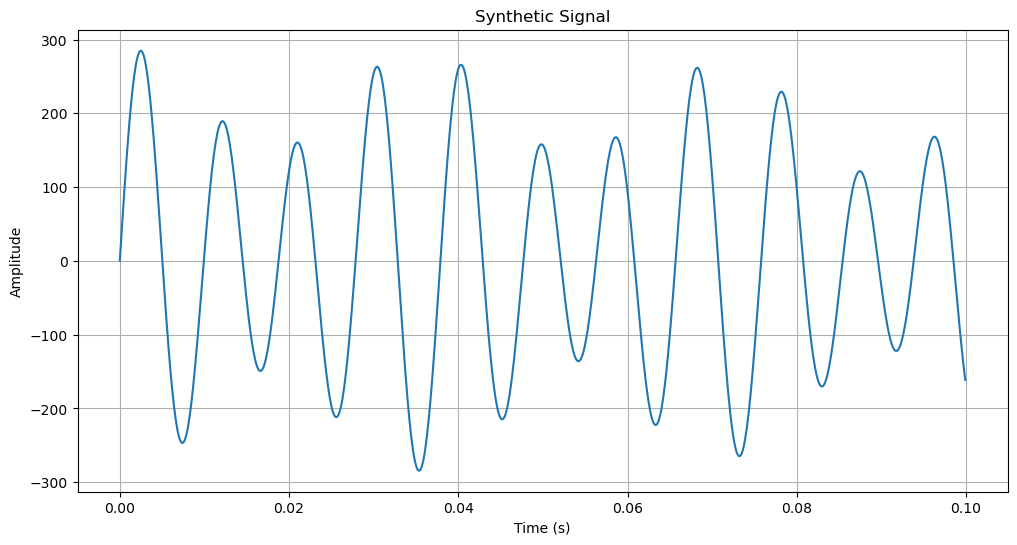

In [3]:
# Parameters for the signal
ds = 1/10000  # Sampling interval
fs = 10000  # Sampling frequency
duration = 10  # Duration in seconds
t = np.arange(0, duration, ds)  # Time vector

# Generate the synthetic signal
signal = sum(amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(3))

# Plot the synthetic signal
plt.figure(figsize=(12, 6))
plt.plot(t[:1000], signal[:1000])  # Plotting only the first 1000 samples for clarity
plt.title("Synthetic Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()



In this part, we analyzed the frequency content of the signal using the Fast Fourier Transform (FFT). The FFT produces a complex spectrum, which was converted to a two-sided magnitude spectrum to visualize all frequency components (both positive and negative). The result illustrates the signal's amplitude contributions at its constituent frequencies.

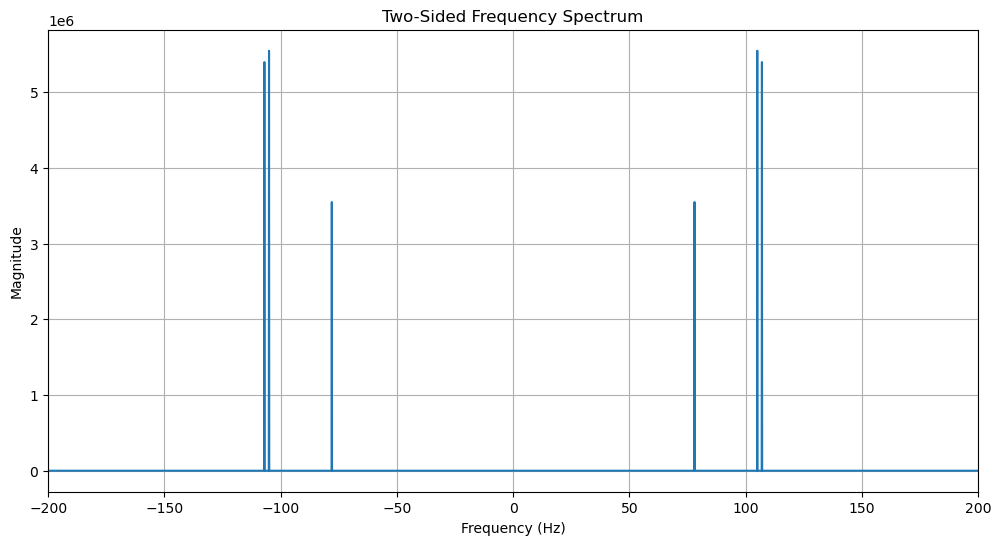

In [12]:
# Analyze the two-sided frequency spectrum of the signal using FFT
fft_values = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(fft_values), d=ds)

plt.figure(figsize=(12, 6))
plt.plot(np.fft.fftshift(fft_freqs), np.fft.fftshift(np.abs(fft_values)))
plt.title("Two-Sided Frequency Spectrum")
plt.xlim(-200, 200)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()



In this section, we will apply an FIR bandpass filter to a signal using the following steps:

Define the cutoff frequencies based on the given signal.
Design the FIR bandpass filter using the firwin function.
Zero-pad the signal to avoid boundary effects during filtering.
Apply the filter to the padded signal.
Remove the padding and plot the original and filtered signals.

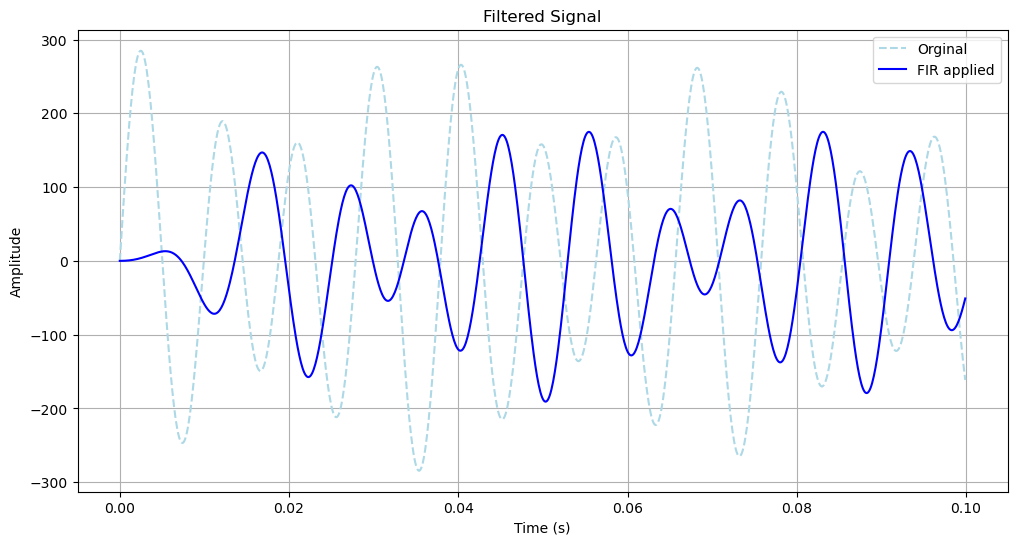

In [9]:
# Design an ideal FIR filter (Bandpass filter)
cutoff_low = frequencies[0] - 10 # 10 Hz below the first frequency
cutoff_high = frequencies[0] + 10  # 10 Hz above the first frequency
num_taps = 300

# Design the FIR filter using firwin
bandpass_filter = firwin(num_taps, [cutoff_low, cutoff_high], fs=fs, pass_zero="bandpass")

# Apply zero padding to the signal
padding = num_taps // 2  # Number of zeros to add on both sides
padded_signal = np.pad(signal, (padding, padding), mode='constant')

# Apply the filter
filtered_signal_padded = lfilter(bandpass_filter, 1.0, padded_signal)

# Remove padding
filtered_signal = filtered_signal_padded[padding:-padding]


# Plot the filtered signal
plt.figure(figsize=(12, 6))
plt.plot(t[:1000], signal[:1000],linestyle="--",color="lightblue",label="Orginal") 
plt.plot(t[:1000], filtered_signal[:1000],color="blue",label="FIR applied")  # Plotting the filtered signal
plt.title("Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend() 
plt.grid()
plt.show()

This plot shows how the FIR bandpass filter affects the signal by allowing frequencies between 68 Hz and 88 Hz to pass while attenuating others. The comparison between the original and filtered signals demonstrates the effectiveness of the filter in isolating the desired frequency range.

After applying the FIR bandpass filter, it is important to analyze the frequency spectrum of the filtered signal to understand the effect of the filtering process on the frequency components. We will use the Fast Fourier Transform (FFT) to compute the frequency spectrum of the filtered signal.

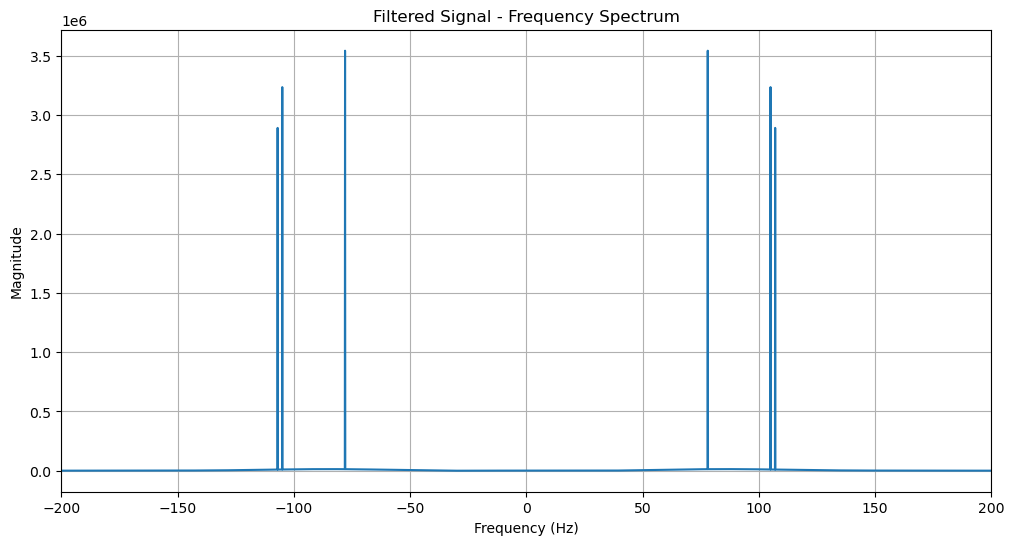

In [11]:
# Reanalyze the filtered signal using FFT
filtered_fft_values = np.fft.fft(filtered_signal)

plt.figure(figsize=(12, 6))
plt.plot(np.fft.fftshift(fft_freqs), np.fft.fftshift(np.abs(filtered_fft_values)))
plt.title("Filtered Signal - Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.xlim(-200, 200)
plt.ylabel("Magnitude")
plt.grid()
plt.show()

The resulting plot will show the frequency spectrum of the filtered signal, illustrating which frequencies remain after filtering.

Passband: The frequencies that fall within the specified passband will have a higher magnitude.
Stopband: Frequencies outside the passband (below 68 Hz or above 88 Hz) will be significantly attenuated (lower magnitude).
This frequency spectrum visualization is helpful for understanding how well the FIR filter has isolated the desired frequency range.